# Volume 4: SIR Models
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people have recently entered the city carrying a certain disease.
Each infected individual has one contact each day that could spread the disease, and an average of three days is spent in the infectious state.

Find the solution of the corresponding SIR equations using `solve_ivp` over a time period of fifty days, and plot your results.
Compare your plot to the figure in the lab pdf.
Use the percentages of each state, not the actual number of people in the state.

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the `t_eval` argument of `solve_ivp` to specify the points in time that you want the solution's value at.
This parameter accepts a linspace of time values.
Specify enough points that your graph is smooth.

In [2]:

def prob1():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''

   # Initialize constants
    beta = 1
    gamma = 1/3
    
    # Define the ODE system
    def ode(t, y):
        return np.array([
            -1 * y[0]* y[1] * beta,
            beta * y[0] * y[1] - gamma * y[1],
            gamma * y[1]
        ])

    # Define the t0 and tf parameters
    t0 = 0
    tf = 50
    
    # Define the initial conditions
    y0 = np.array([(3e6 - 5)/3e6, 5/3e6, 0])
    
    # Solve the system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval = np.linspace(t0, tf, 51))
    
    # Plot the data
    plt.plot(sol.t, sol.y[0], color = 'black', label='Susceptible')
    plt.plot(sol.t, sol.y[1], color = 'red', label = 'Infected')
    plt.plot(sol.t, sol.y[2], color = 'blue', label = 'Recovered')
    plt.xlabel('T (days)')
    plt.ylabel('Proportion of Population')
    plt.legend()
    plt.title('SIR Model for Disease Spread')
    plt.show()
    
    # Find total number of people that can work
    max_active_cases = max(sol.y[1]) * 3e6
    num_people_work = 3e6 - max_active_cases
    
    # Print number
    print("Total Number of People that can work: ", num_people_work)
    
    

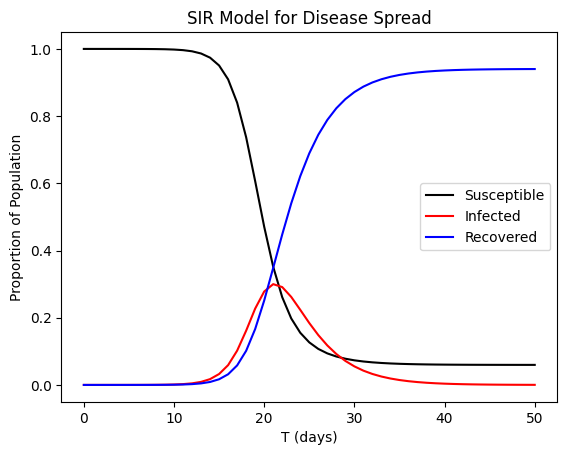

Total Number of People that can work:  2100165.416456901


In [3]:
prob1()

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of COVID-19.
On that day, New York started its lock-down measures.
Using the following information, model what the spread of the virus could have been, using `solve_ivp()`, if New York did not implement any measures to curb the spread of the virus over the next 150 days:


 - There are approximately 8.399 million people in New York City.
 - The average case of COVID-19 lasts for 10 days.
 - Each infected person spreads the virus to 2.5 people on average over the whole time that they are sick.

Plot your results for each day and compare to the figure in the lab pdf.
Also answer the following questions:
 - At the projected peak, how many concurrent active cases are there?
 - Assuming that about 5% of COVID-19 cases require hospitalization, and using the fact that there are about 58,000 hospital beds in NYC, how many beds over capacity will the hospitals in NYC be at the projected peak?

Hint: Recall that $\beta$ is the average number of contacts an infected person makes per day that could spread the disease, and $\gamma$ is the reciprocal of the average length of time spent in the infectious phase.

In [4]:
def prob2():
    '''
    Implement the SIR model, plot a graph that models the
    spread of COVID-19 in NYC, and answer these questions:
      1. What is the number of concurrent cases at the projected peak?
      2. How many hospital beds over capacity will NYC be at the projected peak?
    Print your answers to the two questions questions.
    '''

   # Initialize constants
    beta = 1/4
    gamma = 1/10
    
    # Define the ODE system
    def ode(t, y):
        return np.array([
            -1 * y[0]* y[1] * beta,
            beta * y[0] * y[1] - gamma * y[1],
            gamma * y[1]
        ])

    # Define the t0 and tf parameters
    t0 = 0
    tf = 150
    
    # Define the initial conditions
    y0 = np.array([(8.399e6 - 52)/8.399e6, 52/8.399e6, 0])
    
    # Solve the system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval = np.linspace(t0, tf, 151))
    
    # Plot the data
    plt.plot(sol.t, sol.y[0], color = 'black', label='Susceptible')
    plt.plot(sol.t, sol.y[1], color = 'red', label = 'Infected')
    plt.plot(sol.t, sol.y[2], color = 'blue', label = 'Recovered')
    plt.xlabel('Days since Mar 11')
    plt.ylabel('Proportion of Population')
    plt.legend()
    plt.title('Modeling Covid-19 in NYC')
    plt.show()
    
    # Problem 1: At the projected peak, how many concurrent active cases are there?
    max_active_cases = max(sol.y[1]) * 8.399e6
    print(f"Problem 1: Concurrent active cases: {max_active_cases}")
    
    # Problem 2:
    over_capacity = 0.05 * max_active_cases - 58_000
    print(f"Problem 2: Beds over capacity: {over_capacity}")
    
    

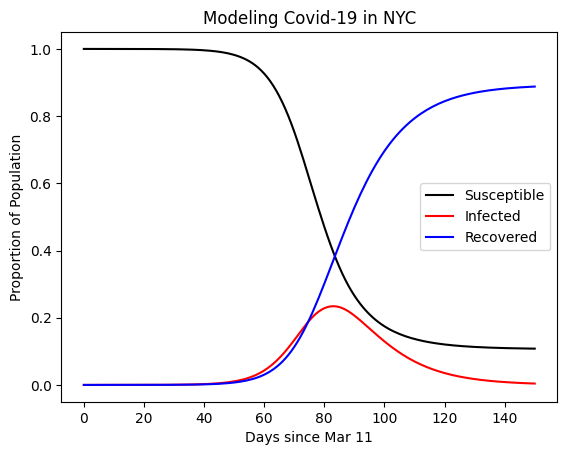

Problem 1: Concurrent active cases: 1967559.5438643338
Problem 2: Beds over capacity: 40377.97719321669


In [5]:
prob2()

# Problem 3

There are 7 billion people in the world.
Influenza, or the flu, is one of those viruses that everyone can be susceptible to, even after recovering.
The flu virus is able to change in order to evade our immune system, and we become susceptible once more, although technically it is now a different strain.

Suppose the virus originates with 1000 people in Texas after Hurricane Harvey flooded Houston, and stagnant water allowed the virus to proliferate.
Suppose the average person is contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with rate $f=1/50$.
The flu is also known to be deadly, killing hundreds of thousands every year on top of the normal death rate.
To assure a steady population, let the birth rate balance out the death rate, and let $\mu=0.0001$.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a one-year span (365 days).
Compare your plot to the figure in the lab pdf.

In [6]:
def prob3():
    '''
    Use the SIRS model to model the spread of flu over the course of a year,
    and create a plot of your results.
    '''
    
    # Initialize constants
    f = 1/50
    mu = 0.0001
    beta = 1/2
    gamma = 1/10
    
    # Define the ODE system
    def ode(t, y):
        return np.array([
            f * y[2] + mu * (1 - y[0]) - beta * y[1] * y[0],
            beta * y[1] * y[0] - (gamma + mu) * y[1],
            -f * y[2] + gamma * y[1] - mu * y[2]
        ])
        
    # Define the t0 and tf parameters
    t0 = 0
    tf = 365
    
    # Define population constants
    N = 7e7
    i_0 = 1000
    
    # Define the initial conditions
    y0 = np.array([(N - i_0)/N, i_0/N, 0])
    
    # Solve the system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval = np.linspace(t0, tf, 366))
    
    # Plot the data
    plt.plot(sol.t, sol.y[0], color = 'black', label='Susceptible')
    plt.plot(sol.t, sol.y[1], color = 'red', label = 'Infected')
    plt.plot(sol.t, sol.y[2], color = 'blue', label = 'Recovered')
    plt.xlabel('Day')
    plt.ylabel('Proportion of Population')
    plt.legend()
    plt.title('Modeling Influenza after Hurricane Harvey')
    plt.show()

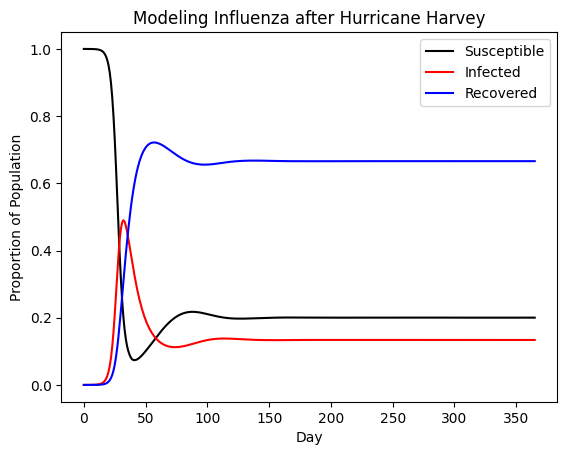

In [7]:
prob3()

# Problem 4

The file `new_york_cases.npy` contains daily case counts for COVID-19 beginning on March 11, 2020.
These counts are the total number of people who have been sick at any time up to that point; that is, the sum of the number of people currently infected and the number of people who have recovered, corresponding to $I(t)+R(t)$.
    
Convert these counts to proportions of New York's population (recall that the total population is 8.399 million people).
Fit the PGED model to the COVID-19 data by using `scipy.optimize.minimize` to find values of $\alpha$ and $T_G$ that minimize the difference between the observed proportions and the model's prediction for $I(t)+R(t)$.
Unlike the example above, in this problem our model is a system of ODEs rather than an explicit formula.
So, to find `model_output` in the function you pass into `scipy.optimize.minimize`, you will need to use `solve_ivp` to solve the system of ODEs every time the function is called.
    
Plot the actual data alongside the values of $I(t)+R(t)$ predicted by your model.
Print the values of $\alpha$ and $T_G$ you found.

Hint: Set $t_0=1$; the PEGD model requires to divide by $t$, so we must have $t\ne0$.
To pass the values of $\alpha$ and $T_G$ into your ODE function, you can use the argument `args=(alpha, T_G)` inside `solve_ivp`.
Use the `t_eval` argument to get the ODE solution values at the correct times.

In [8]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against I(t)+R(t).
    '''
    
    # Initialize population constants
    N = 8.399e6
    i_0 = 52
    
    # Load in COVID data
    covid_data = np.load('new_york_cases.npy')
    covid_data_proportions = covid_data/N
    
    
    # Define the function we want to minimize
    def calculate_error(params):
        # Unpack the parameters
        alpha, T_G = params
        
        # Define the ODE system
        def ode(t, y):
            return np.array([
                - (alpha/t) * y[1],
                (alpha/t - 1/T_G) * y[1],
                (1/T_G) * y[1]
            ])
            
        # Define the t0 and tf parameters
        t0 = 1
        tf = len(covid_data)
        
        # Define the initial conditions
        y0 = np.array([(N - i_0)/N, i_0/N, 0])
        
        model_prediction = solve_ivp(ode, (t0, tf), y0, t_eval = np.linspace(t0, tf, len(covid_data)))
        
        diff = (model_prediction.y[1] + model_prediction.y[2]) - covid_data_proportions
        
        # Calculate the error
        return np.linalg.norm(diff)
    
    
    # Make a guess for the parameters
    p0 = (1,1)
    
    # Find the best parameters
    result = minimize(calculate_error, p0)
    print("Values of alpha and T_G")
    print(result.x)
    
    
    # Initialize best alpha and T_G constants
    alpha = 2.53078234
    T_G = 16.97320539
    
    # Run the ODE with these optimal constants
    def ode(t, y):
        return np.array([
            - (alpha/t) * y[1],
            (alpha/t - 1/T_G) * y[1],
            (1/T_G) * y[1]
        ])
    
    # Define the t0 and tf parameters
    t0 = 1
    tf = len(covid_data)
    
    # Define the initial conditions
    y0 = np.array([(N - i_0)/N, i_0/N, 0])
    
    # Solve IVP
    sol = solve_ivp(ode, (t0, tf), y0, t_eval = np.linspace(t0, tf, len(covid_data)))
    
    # Create a time linspace
    T = np.linspace(0, len(covid_data), len(covid_data))
    
     # Plot the data
    plt.plot(sol.t, sol.y[1] + sol.y[2], color = 'red', label='I(t) + R(t)')
    plt.plot(T, covid_data_proportions, color ='blue', label = "Data")
    plt.xlabel('Days since Mar 11')
    plt.ylabel('Proportion of Population')
    plt.legend()
    plt.title('Modeling NYC covid cases with SIR')
    plt.show()
    
    
    

Values of alpha and T_G
[ 2.53078234 16.97320539]


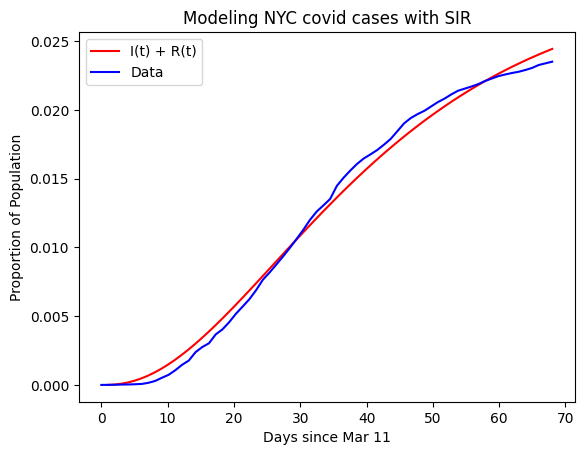

In [9]:
prob4()

# Problem 5

In this problem we will solve the BVP in the lab pdf modeling measles cases.

Let the periodic function for our measles case be $\beta(t) = \beta_0(1 + \beta_1 \cos{2\pi t})$.
Use parameters $\beta_1 = 1,$ $\beta_0 = 1575,$ $\eta = 0.01,$ $\lambda = 0.0279,$ and $\mu = 0.02.$
With these parameter values, time is measured in years, so run the solution over the interval $[0, 1]$ to show a one-year cycle.
The boundary conditions  are just saying that the year will begin and end in the same state.

Create functions for the ODE and for the boundary conditions.
Solve the BVP with the given parameters over a period of one year, and plot the values of $S$, $E$, and $I$.
Compare your results with the figure in the lab pdf.

Hint: Use the initial conditions from the figure as your initial guess. 
Remember that the initial infected proportion is small, not 0.

In [10]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value problem.
    '''
    
    # Initialize constants and lambda function
    B_0 = 1575
    B_1 = 1
    n = 0.01
    lambd = 0.0279
    mu = 0.02
    b = lambda t: B_0 * (1 + B_1 * np.cos(2*np.pi * t))
    
    # Define the ODE system
    def ode(t,y):
        
        return np.array([
            mu - b(t) * y[0] * y[2],
            b(t) * y[0] * y[2] - y[1]/lambd,
            y[1]/lambd - y[2]/n
            ])
    
    # Define the boundary condition function
    def bcs(ya, yb):
        return np.array([
            ya[0] - yb[0],
            ya[1] - yb[1],
            ya[2] - yb[2]
        ])
    
    # Guess of the solution values
    t = np.linspace(0,1, 500)
    y_guess = np.array([0.073, 0.001, 0.001]).reshape((-1,1)) * np.ones((3, len(t)))
    
    # Solve the BVP
    sol = solve_bvp(ode, bcs, t, y_guess)
    
    # Plot the data
    plt.plot(sol.x, sol.y[0], color = 'black', label = 'Susceptible')
    plt.plot(sol.x, sol.y[1], color = 'green',label = 'Exposed')
    plt.plot(sol.x, sol.y[2], color = 'red', label = 'Infected')
    plt.legend()
    plt.xlabel('T (days)')
    plt.ylabel('Proportion of Population')
    plt.title('Problem 5')
    plt.show()
    
    
    
    
    

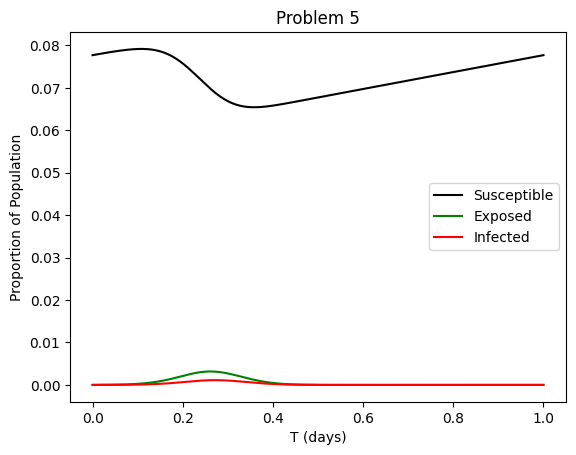

In [11]:
prob5()